In [2]:
import lsst.meas.astrom as measAstrom
import lsst.daf.base as dafBase
import lsst.pipe.base as pipeBase
import lsst.daf.persistence as dafPersist

import random
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.display.ds9 as ds9
import lsst.afw.image as afwimage
import lsst.afw.table as afwTable

import lsst.afw.geom as afwGeom
import lsst.afw.display.utils as displayUtils

In [14]:
w,h = 20, 20
im_array = np.zeros([w,h], dtype=float)

In [12]:
im = afwimage.makeImageFromArray(im_array)
ds9.mtv(im)

In [30]:
c1 = int(w/2)
c2 = int(h/2)

mask_array = np.zeros([w,h], dtype=np.int0)
for i in range(w):
    for j in range(h):
        if (i-c1)*(i-c1) + (j-c2)*(j-c2) < 36:
            mask_array[i][j] = 2

In [33]:
mi = afwimage.MaskedImageF(20,20)

mask = mi.getMask()

mplane = mask.addMaskPlane("DETECTED")

c1 = int(w/2)
c2 = int(h/2)

for i in range(w):
    for j in range(h):
        if (i-c1)*(i-c1) + (j-c2)*(j-c2) < 36:
            mask[i,j] = mplane

In [147]:
ds9.mtv(exp_list[10])

In [146]:
noise = np.random.normal(0,25,1000)
np.sum(noise)

-1123.4789958692197

In [109]:
exp_list = []
for n in range(200):

    mi = afwimage.MaskedImageF(20,20)

    mask = mi.getMask()

    mplane = mask.addMaskPlane("DETECTED")

    c1 = int(w/2)
    c2 = int(h/2)

    for i in range(w):
        for j in range(h):
            if (i-c1)*(i-c1) + (j-c2)*(j-c2) < 36:
                mask[i,j] = mplane
    noise = np.random.normal(0,25,400)
    noise = noise.reshape(20,20)
    im = mi.getImage()

    for i in range(w):
        for j in range(h):
            im.set(i,j,noise[i,j])
    exp = afwimage.ExposureF()
    exp.setMaskedImage(mi)
    exp_list.append(exp)

In [148]:
def get_array_from_stamp(stamp):
    mi = stamp.getMaskedImage()
    mask = mi.getMask()
    pixels_in_mask =0



    values_out = []
    values_in = []

    bitmask_detected = mask.getPlaneBitMask("DETECTED")
    #bitmask_detected_neg = mask.getPlaneBitMask("DETECTED_NEGATIVE")
    #print "///"
    #print bitmask
    #print "///"

    for x in range(0, mi.getWidth()):
        for y in range (0, mi.getHeight()):
            u =  mi.getMask()[x,y]

            if u.get(0,0) & bitmask_detected == 0 and u.get(0,0):
                values_out.append(mi.getImage().get(x,y))

            else:
                values_in.append(mi.getImage().get(x,y))
                pixels_in_mask += 1

    return values_out, values_in, pixels_in_mask

In [161]:
fluxes = []
sigmas = []
sigmas_pos =[]
sigmas_neg =[]
for exp in exp_list:
    values_out, values_in, pixels_in_mask = get_array_from_stamp(exp)
    
    flux = np.sum(values_in)
    sigma = np.std(values_out)
    
    #print flux, np.mean(values_in)
    
    fluxes.append(flux)
    sigmas.append(sigma)
    
    if flux > 0:
        sigmas_pos.append(sigma)
    else:
        sigmas_neg.append(sigma)

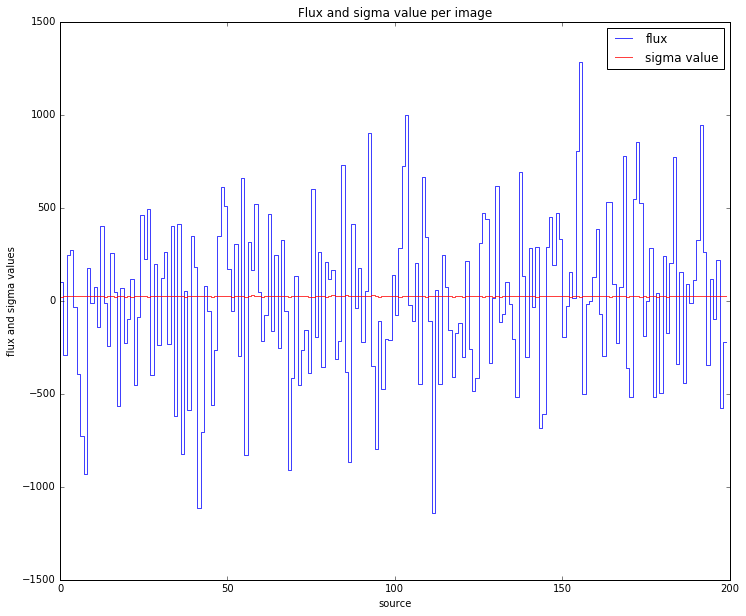

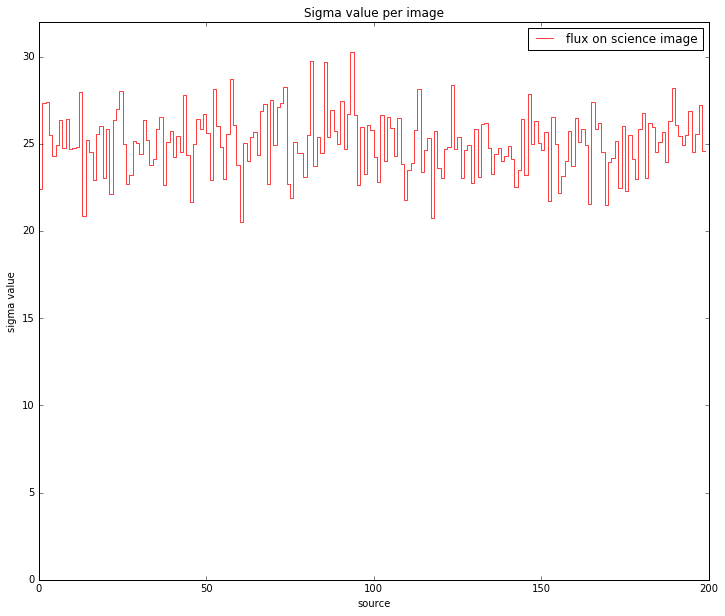

std value = 25.038352585
427.569892812


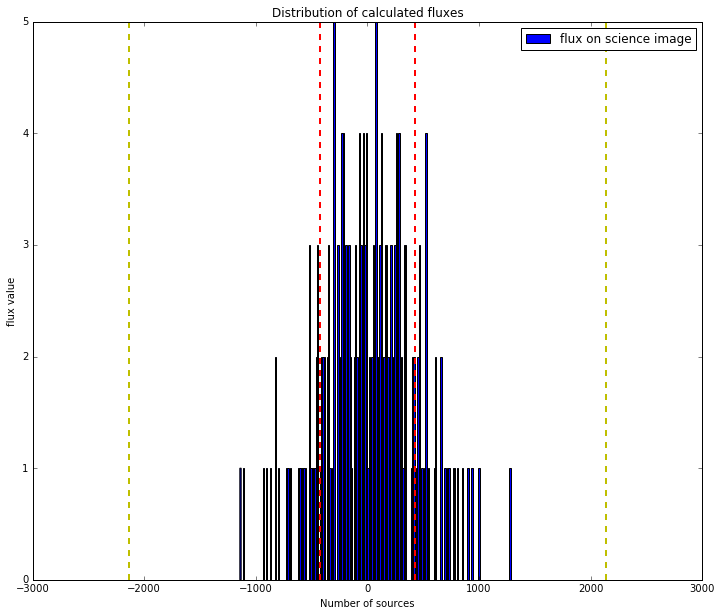

In [166]:
sources = list(range(len(fluxes)))

plt.figure(figsize=(12,10))
plt.plot(sources, fluxes, color='b', ls='steps', alpha=0.75,label='flux')
plt.plot(sources, sigmas, color='r', ls='steps', alpha=0.75,label='sigma value')
plt.title('Flux and sigma value per image')
plt.xlabel("source")
plt.ylabel("flux and sigma values")
plt.legend()
plt.show()


plt.figure(figsize=(12,10))
plt.plot(sources, sigmas, color='r', ls='steps', alpha=0.75,label='flux on science image')
ax=plt.axes()
ax.set_ylim(ymin=0)
plt.title('Sigma value per image')
plt.xlabel("source")
plt.ylabel("sigma value")
plt.legend()
plt.show()
print "std value =", np.mean(sigmas)


positive_sigma = np.sqrt(pixels_in_mask)*np.mean(sigmas_pos)
negative_sigma = np.sqrt(pixels_in_mask)*np.mean(sigmas_neg)
plt.figure(figsize=(12,10))
plt.hist(fluxes, color='b',label='flux on science image', bins=200)

print positive_sigma 
plt.axvline(positive_sigma, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-negative_sigma, color='r', linestyle='dashed', linewidth=2)
plt.axvline(positive_sigma*5, color='y', linestyle='dashed', linewidth=2)
plt.axvline(-(negative_sigma*5), color='y', linestyle='dashed', linewidth=2)
plt.title('Distribution of calculated fluxes')
plt.xlabel("Number of sources")
plt.ylabel("flux value")
plt.legend()
plt.show()




In [123]:
print fluxes

[144.21388641721569, 100.96182288974524, -293.82594313845038, 245.94163351133466, 274.58632256649435, -34.578245937824249, -394.43038319982588, -726.07541283965111, -929.68832428194582, 176.05434274300933, -12.352807836607099, 76.643819440156221, -140.74180349707603, 400.89537290530279, -11.863847534172237, -245.28245174884796, 256.08339464664459, 44.807232350111008, -565.69719072431326, 71.45714633539319, -229.2739394903183, -95.502746164798737, 116.44131667539477, -451.82923582196236, -85.716076523065567, 459.07788663357496, 223.76249658549204, 494.38716363348067, -400.45952559821308, 196.78311860188842, -239.31802563369274, 124.55113074928522, 259.70388841629028, -229.82986213639379, 402.52891197800636, -620.1658028960228, 413.97262971661985, -821.16052867472172, 53.136287853121758, -587.59357860684395, 345.84692713618279, 183.15163710713387, -1112.6471647024155, -707.33283334597945, 80.294572606682777, -52.170761123299599, -559.42343848571181, -262.10682460665703, 348.6999931335449